
Equipo 18 - Microproyecto 3


**Integrantes**

*   Sofia Andrade Palacio
*   Miller Johan Chica Acero
* Luis Andres Altamar Romero


## **1) Exploración y pre-procesamiento de los datos**

In [ ]:
#imports que se utilizaran para el desarrollo
import matplotlib
import numpy as np
import pandas as pd
import seaborn as sb
from tabulate import tabulate
import matplotlib.pyplot as plt

import sklearn

from sklearn.cluster import AgglomerativeClustering
import sklearn.metrics as sm
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances_argmin_min
from sklearn.preprocessing import StandardScaler, normalize, MinMaxScaler


import scipy
from scipy import stats
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist

from pylab import rcParams
import seaborn as sb

from google.colab import files
import io

from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
np.random.seed(1)
plt.figure(figsize=(25,12))
%matplotlib inline
plt.style.use("seaborn-whitegrid")

<ipython-input-1-fd2129a2c8ba>:39: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


<Figure size 2500x1200 with 0 Axes>

Se carga el dataset y se omite la primera final, la cual corresponde al titulo

In [ ]:
#Carga de los datos
uploaded = files.upload()
forest_fires_df = pd.read_csv(io.BytesIO(uploaded["Algerian_forest_fires.csv"]), skiprows=1)


Saving Algerian_forest_fires.csv to Algerian_forest_fires.csv


In [ ]:
#Nombre de las columnas
print(forest_fires_df.columns)

Index(['day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')


Se observa que algunos nombres de las variables contienen espacios, para evitar posibles errores futuros, se elimina dichos espacios

In [ ]:
# Renombrar las columnas para eliminar espacios
forest_fires_df.columns = [col.strip() for col in forest_fires_df.columns]

# Verificar los nombres de las columnas después de la modificación
print("\nNombres de las columnas después de eliminar espacios:")
print(forest_fires_df.columns)


Nombres de las columnas después de eliminar espacios:
Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')


Se visualiza el tipo de datos de las variables para su análisis y se observa que todos los datos son tipo object, por lo tanto, se realizará un cambio del tipo de varible.

In [ ]:
# Ver el tipo de datos de cada columna
print(forest_fires_df.dtypes)

day            object
month          object
year           object
Temperature    object
RH             object
Ws             object
Rain           object
FFMC           object
DMC            object
DC             object
ISI            object
BUI            object
FWI            object
Classes        object
dtype: object


In [ ]:
forest_fires_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4   RH           245 non-null    object
 5   Ws           245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


Antes de realizar el cambio de tipo, se observa que una fila del dataset contiene un error: los valores de una variable se han juntado en una sola, desplazando los valores siguientes a sus variables vecinas y dejando un espacio NaN al final. Se decide entonces corregir esa línea del dataset.

In [ ]:
print(forest_fires_df.iloc[167])

day                 14
month               07
year              2012
Temperature         37
RH                  37
Ws                  18
Rain               0.2
FFMC              88.9
DMC               12.9
DC              14.6 9
ISI               12.5
BUI               10.4
FWI            fire   
Classes            NaN
Name: 167, dtype: object


En el dataset la informacion viene dividida por dos bloques de informacion, por lo tanto, hay dos filas del que podrian generar errores. La primera fila corresponde al nombre del segundo bloque de informacion y la segundo a las variables anteriormente mencionadas, por lo tanto se procedera a la eliminación de ambas

In [ ]:
# Seleccionar las filas 122 y 123
selected_rows = forest_fires_df.iloc[[122, 123]]

# Imprimir las filas en formato pandas
print(selected_rows)

                               day  month  year  Temperature   RH   Ws   Rain  \
122  Sidi-Bel Abbes Region Dataset    NaN   NaN          NaN  NaN  NaN    NaN   
123                            day  month  year  Temperature   RH   Ws  Rain    

     FFMC  DMC   DC  ISI  BUI  FWI    Classes  
122   NaN  NaN  NaN  NaN  NaN  NaN        NaN  
123  FFMC  DMC   DC  ISI  BUI  FWI  Classes    


Se realiza una copia del dataset para manipularlo de una manera más aprapiada y no afectar el original, después de eliminar se vuelve a organizar los indexes del dataset.

In [ ]:
forest_fires_df_copy = forest_fires_df.copy()

forest_fires_df_copy  = forest_fires_df_copy.drop([122, 123])
print(forest_fires_df_copy)
forest_fires_df_copy.reset_index(drop=True, inplace=True)

    day month  year Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI   BUI  \
0    01    06  2012          29  57  18     0  65.7  3.4   7.6  1.3   3.4   
1    02    06  2012          29  61  13   1.3  64.4  4.1   7.6    1   3.9   
2    03    06  2012          26  82  22  13.1  47.1  2.5   7.1  0.3   2.7   
3    04    06  2012          25  89  13   2.5  28.6  1.3   6.9    0   1.7   
4    05    06  2012          27  77  16     0  64.8    3  14.2  1.2   3.9   
..   ..   ...   ...         ...  ..  ..   ...   ...  ...   ...  ...   ...   
241  26    09  2012          30  65  14     0  85.4   16  44.5  4.5  16.9   
242  27    09  2012          28  87  15   4.4  41.1  6.5     8  0.1   6.2   
243  28    09  2012          27  87  29   0.5  45.9  3.5   7.9  0.4   3.4   
244  29    09  2012          24  54  18   0.1  79.7  4.3  15.2  1.7   5.1   
245  30    09  2012          24  64  15   0.2  67.3  3.8  16.5  1.2   4.8   

     FWI       Classes  
0    0.5   not fire     
1    0.4   not fire     


Se vuelve a observar espacios blancos pero esta vez en la variable "Classes", por lo que se procede a eliminar los espacios de todos los valores de esa variable y asi poder manipularla

In [ ]:
forest_fires_df_copy['Classes'] = forest_fires_df_copy['Classes'].str.strip()

Se corrige los valores de la fila anteriormente mencionada, donde sus valores se movieron generando un NaN

In [ ]:
forest_fires_df_copy.iloc[165] = [14, 7, 2012, 37, 37, 18, 0.2, 88.9, 12.9, 14.6, 9, 12.5, 10.4, 'fire']


Ya con la correción y la eliminación de las filas que podian generar errores, se procede al cambio de tipos de las variables, ademas de cambiar la variable de classes a numérica

In [ ]:

numeric_columns = ['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI']
forest_fires_df_copy[numeric_columns] = forest_fires_df_copy[numeric_columns].astype(float)

# Convertir la columna 'Classes' a valores numéricos
# Asumimos que 'not fire' debe ser 0 y 'fire' debe ser 1
forest_fires_df_copy['Classes'] = forest_fires_df_copy['Classes'].map({'not fire': 0, 'fire': 1})

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Verificar los tipos de datos después de la conversión
print("\nTipos de datos después de la conversión:")
print(forest_fires_df_copy)


Tipos de datos después de la conversión:
      day  month    year  Temperature    RH    Ws  Rain  FFMC   DMC     DC  \
0     1.0    6.0  2012.0         29.0  57.0  18.0   0.0  65.7   3.4    7.6   
1     2.0    6.0  2012.0         29.0  61.0  13.0   1.3  64.4   4.1    7.6   
2     3.0    6.0  2012.0         26.0  82.0  22.0  13.1  47.1   2.5    7.1   
3     4.0    6.0  2012.0         25.0  89.0  13.0   2.5  28.6   1.3    6.9   
4     5.0    6.0  2012.0         27.0  77.0  16.0   0.0  64.8   3.0   14.2   
5     6.0    6.0  2012.0         31.0  67.0  14.0   0.0  82.6   5.8   22.2   
6     7.0    6.0  2012.0         33.0  54.0  13.0   0.0  88.2   9.9   30.5   
7     8.0    6.0  2012.0         30.0  73.0  15.0   0.0  86.6  12.1   38.3   
8     9.0    6.0  2012.0         25.0  88.0  13.0   0.2  52.9   7.9   38.8   
9    10.0    6.0  2012.0         28.0  79.0  12.0   0.0  73.2   9.5   46.3   
10   11.0    6.0  2012.0         31.0  65.0  14.0   0.0  84.5  12.5   54.3   
11   12.0    6.0  2012

Estas variables son cruciales para comprender y predecir el comportamiento de los incendios forestales. Cada una de ellas ofrece información relevante sobre las condiciones ambientales y la probabilidad de ocurrencia y propagación de incendios. A continuación se detalla la importancia y la definición de cada variable:

### Variables Meteorológicas

1. **Temperatura al mediodía (Temp)**:
   - **Definición**: Representa la temperatura máxima del día medida al mediodía, en grados Celsius.
   - **Importancia**: La temperatura elevada es un factor clave que influye en la inflamabilidad de los combustibles. Temperaturas más altas tienden a reducir la humedad de la vegetación, haciéndola más susceptible a incendiarse.

2. **Humedad Relativa (RH)**:
   - **Definición**: Es el porcentaje de humedad presente en el aire en relación con la cantidad máxima que podría existir a esa temperatura.
   - **Importancia**: Una menor humedad relativa significa que el aire es más seco, lo que favorece la combustión y la propagación del fuego. La humedad alta, por otro lado, puede ayudar a mitigar la severidad de un incendio.

3. **Velocidad del Viento (Ws)**:
   - **Definición**: Velocidad del viento medida en kilómetros por hora.
   - **Importancia**: El viento es un factor crítico en la propagación de incendios. Puede avivar las llamas y transportar brasas a nuevas áreas, incrementando la velocidad y el alcance del incendio.

4. **Lluvia (Rain)**:
   - **Definición**: Cantidad total de lluvia registrada en un día, medida en milímetros.
   - **Importancia**: La lluvia es esencial para reducir la probabilidad de incendios. Lluvias recientes pueden humedecer la vegetación y el suelo, disminuyendo el riesgo de ignición y propagación.

### Componentes del Sistema FWI (Fire Weather Index)

5. **Índice de Humedad de Combustibles Finos (FFMC)**:
   - **Definición**: Mide la humedad de los combustibles finos (hojas, pasto seco), que son los más fáciles de encender.
   - **Importancia**: Un FFMC alto indica que los combustibles finos están muy secos y, por lo tanto, muy inflamables, aumentando la probabilidad de que un incendio comience y se propague rápidamente.

6. **Índice de Humedad del Mantillo (DMC)**:
   - **Definición**: Refleja la cantidad de humedad en el mantillo forestal y en las capas superficiales del suelo.
   - **Importancia**: Un DMC bajo indica condiciones húmedas, lo que reduce la probabilidad de que los combustibles de mediano tamaño se enciendan. Un DMC alto sugiere que estos materiales están secos y podrían contribuir a incendios más intensos.

7. **Índice de Sequía (DC)**:
   - **Definición**: Mide la humedad en capas más profundas del suelo, reflejando la sequía prolongada.
   - **Importancia**: Un DC alto indica condiciones de sequía severa, lo que sugiere que un incendio podría ser persistente y difícil de controlar debido a la falta de humedad en capas profundas del suelo.

8. **Índice de Propagación Inicial (ISI)**:
   - **Definición**: Estima la velocidad con la que un incendio podría propagarse inicialmente.
   - **Importancia**: Un ISI alto indica que un incendio se podría expandir rápidamente justo después de su inicio, complicando los esfuerzos de control.

9. **Índice de Acumulación (BUI)**:
   - **Definición**: Combina el DMC y el DC para dar una medida del contenido total de combustible disponible para la quema.
   - **Importancia**: Un BUI alto sugiere que hay una gran cantidad de material seco listo para arder, lo que podría resultar en incendios más severos y difíciles de extinguir.

10. **Índice de Condiciones Meteorológicas de Incendio (FWI)**:
    - **Definición**: Es un índice general que combina los anteriores (FFMC, DMC, ISI, BUI) para dar una estimación de la intensidad potencial del fuego.
    - **Importancia**: El FWI proporciona una visión general de la probabilidad y peligrosidad de los incendios. Un valor alto de FWI indica un riesgo significativo de incendios severos y generalizados.

### Clases

11. **Clases**:
    - **Definición**: Esta variable clasifica las observaciones en dos categorías: "Fire" (Incendio) y "not Fire" (No Incendio).
    - **Importancia**: Esta es la variable de respuesta en muchos modelos predictivos de incendios forestales. Permite clasificar y estudiar las condiciones bajo las cuales es más probable que ocurra un incendio.

### Conclusión

Cada una de estas variables juega un papel fundamental en la predicción y manejo de incendios forestales. Las condiciones meteorológicas como la temperatura, la humedad, el viento, y la lluvia afectan directamente la posibilidad de ignición y la intensidad de los incendios. Los componentes del sistema FWI proporcionan una estimación detallada del estado de los combustibles forestales, permitiendo a los expertos anticipar la severidad y propagación de los incendios. En conjunto, estas variables son esenciales para la toma de decisiones informadas en la prevención y control de incendios forestales.


Se analiza la cantidad de instancias para los tipos de la clase Classes y se confirma la información del txt brindado para el desarrollo del trabajo.

In [ ]:
class_counts = forest_fires_df_copy['Classes'].value_counts()
print("Cantidad de variables en 'Classes':")
print(class_counts)

Cantidad de variables en 'Classes':
Classes
1    138
0    106
Name: count, dtype: int64


Se hace una previsualización de los datos para verificar que los cambios se ejecturon correctamente

In [ ]:
forest_fires_df_copy.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1.0,6.0,2012.0,29.0,57.0,18.0,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0
1,2.0,6.0,2012.0,29.0,61.0,13.0,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0
2,3.0,6.0,2012.0,26.0,82.0,22.0,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0
3,4.0,6.0,2012.0,25.0,89.0,13.0,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0
4,5.0,6.0,2012.0,27.0,77.0,16.0,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0


In [ ]:
forest_fires_df_copy.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
239,26.0,9.0,2012.0,30.0,65.0,14.0,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1
240,27.0,9.0,2012.0,28.0,87.0,15.0,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0
241,28.0,9.0,2012.0,27.0,87.0,29.0,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0
242,29.0,9.0,2012.0,24.0,54.0,18.0,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0
243,30.0,9.0,2012.0,24.0,64.0,15.0,0.2,67.3,3.8,16.5,1.2,4.8,0.5,0


In [ ]:
#Número de filas y columnas del dataset
forest_fires_df_copy.shape

(244, 14)

Se genera un histograma por variable para analizar su comportamiento, se especifica que la informacion del dia, mes y año no aporta informacion relevante

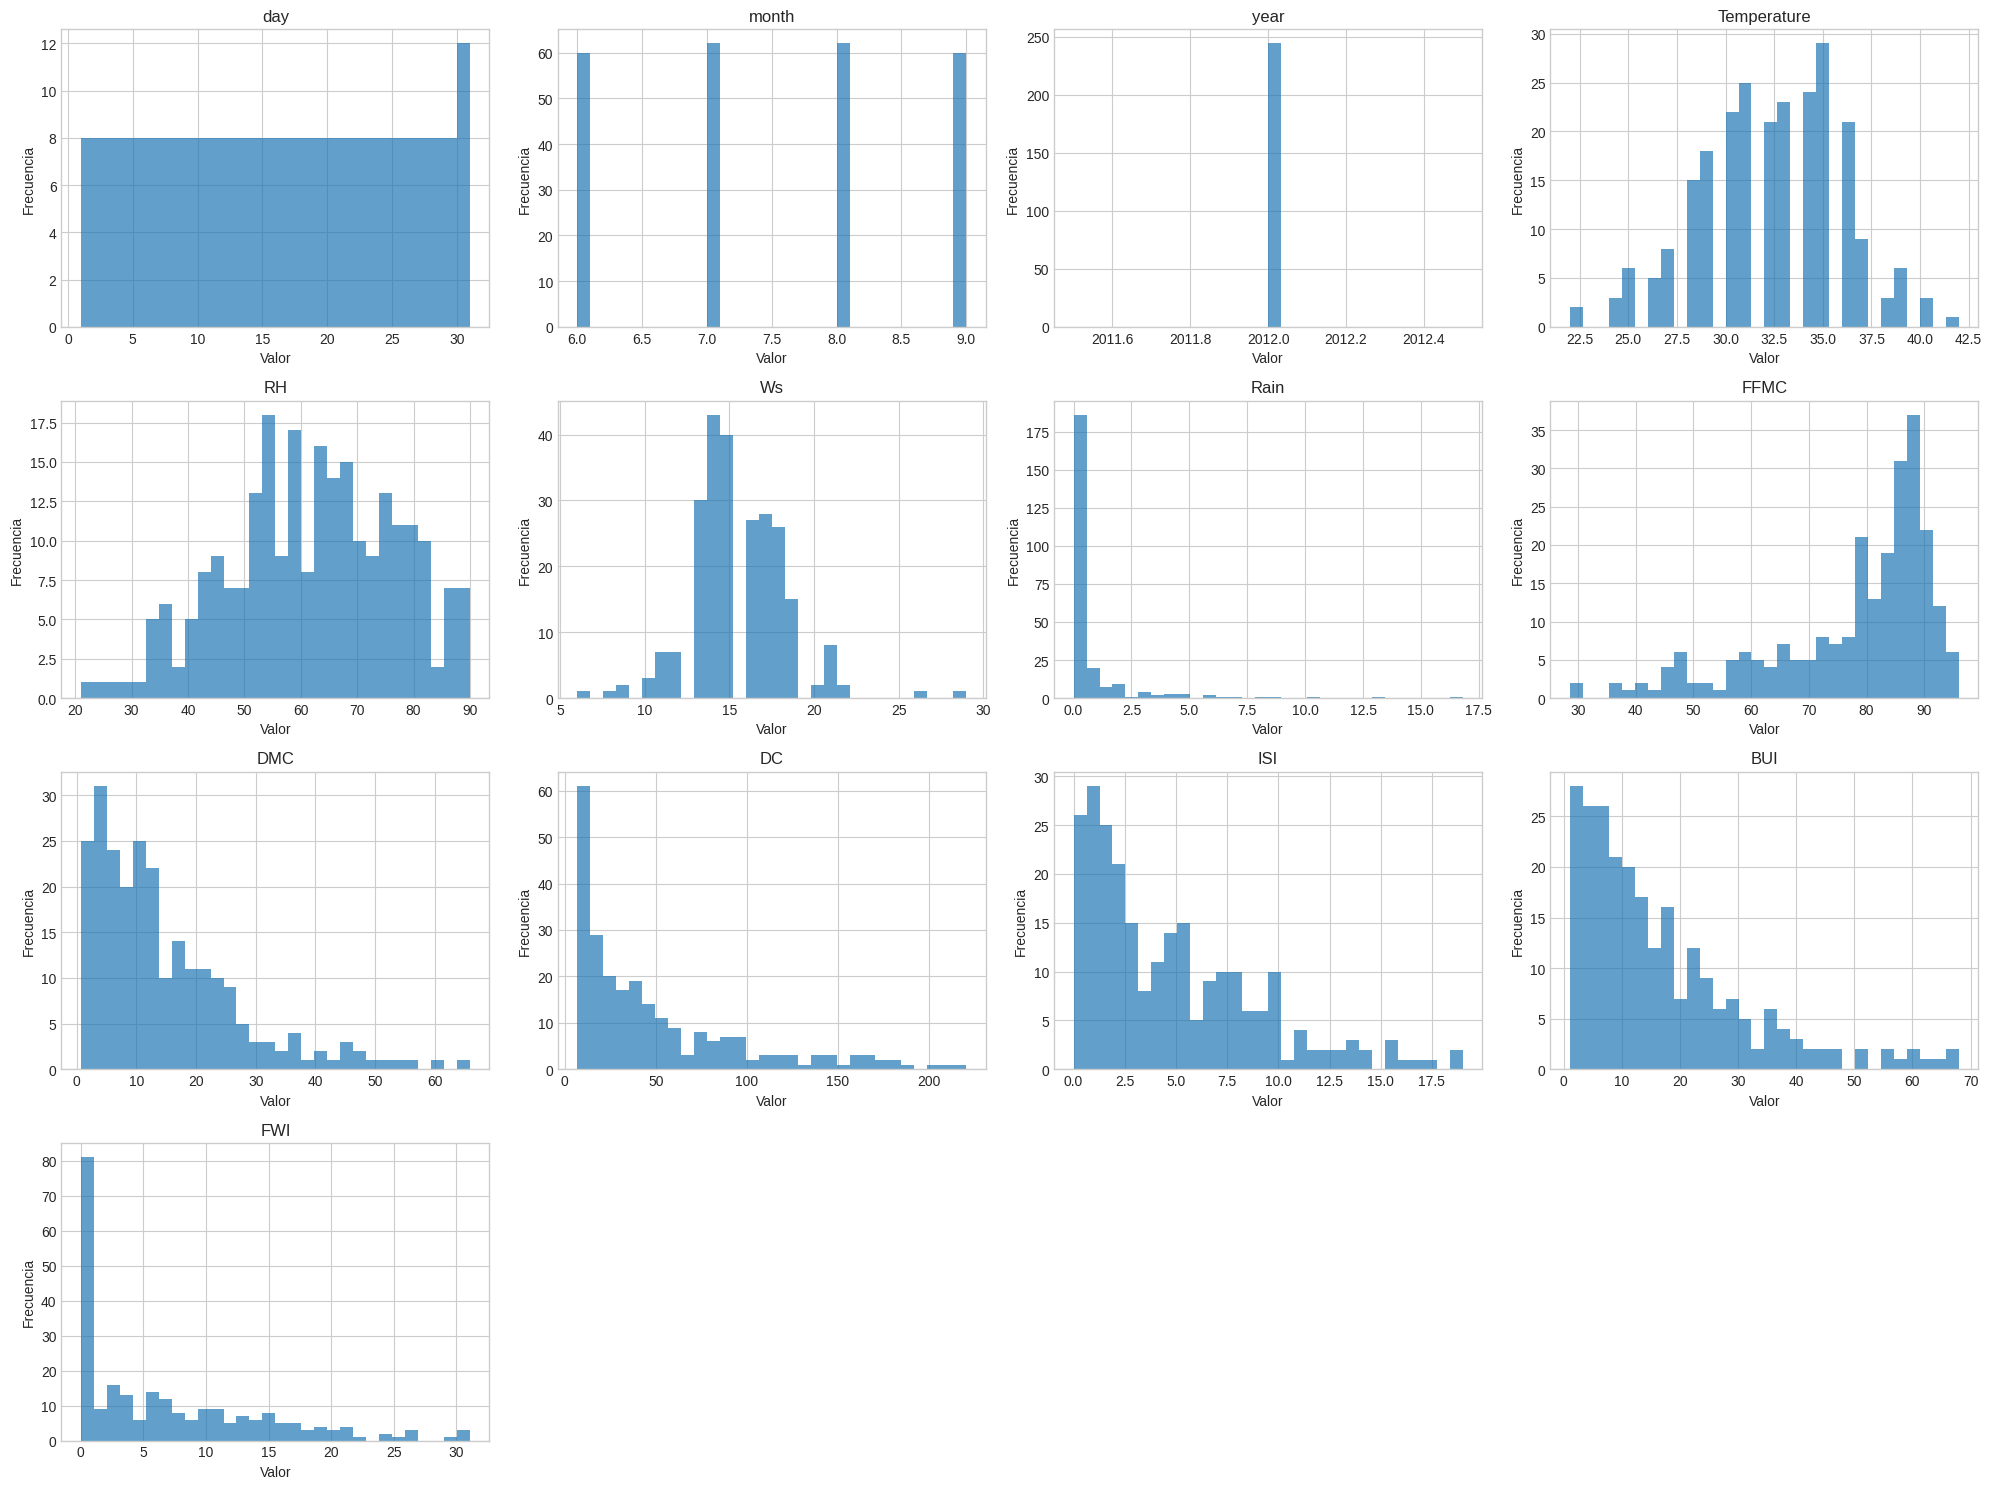

In [ ]:
# Realizamos histogramas para cada variable para asi analizar que tipo de comportamientos tienen y como se distribuye
num_vars = 13
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 15))
axes = axes.flatten()  # Aplana el arreglo de ejes para acceder fácilmente

for i, column in enumerate(forest_fires_df_copy.columns):
    if i < num_vars:
        axes[i].hist(forest_fires_df_copy[column], bins=30, alpha=0.7)
        axes[i].set_title(column)
        axes[i].set_xlabel('Valor')
        axes[i].set_ylabel('Frecuencia')

# Elimina el último subplot si no se usa
if num_vars < len(axes):
    for j in range(num_vars, len(axes)):
        fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Observando las distribuciones de las variables presentadas en los histogramas, podemos hacer las siguientes observaciones:

1. **Variables Temporales (día, mes, año)**:
   - **Día**: Los datos parecen estar distribuidos de manera uniforme a lo largo del mes, con una ligera acumulación al final (día 31).
   - **Mes**: La mayoría de los registros provienen de los meses de verano (julio y agosto), lo que coincide con la temporada de incendios en muchas regiones.
   - **Año**: La mayoría de los datos provienen del año 2012, lo que podría indicar que ese año fue particularmente significativo para la recolección de datos o para la ocurrencia de incendios.

2. **Temperatura**:
   - La distribución de la temperatura es sesgada hacia la derecha, concentrándose principalmente entre 26°C y 36°C. Esto sugiere que la mayoría de las observaciones se hicieron en condiciones cálidas, lo cual es coherente con la idea de que las altas temperaturas favorecen la ocurrencia de incendios.

3. **Humedad Relativa (RH)**:
   - La distribución es bimodal, con picos alrededor del 35% y el 65%, lo que podría reflejar variabilidad en las condiciones de humedad ambiental durante los eventos estudiados. Estos valores son típicos en situaciones de riesgo de incendios, donde la baja humedad puede contribuir significativamente a la ignición y propagación del fuego.

4. **Velocidad del Viento (Ws)**:
   - La mayor parte de las observaciones se concentra entre 12 km/h y 18 km/h. Estos valores de velocidad del viento son suficientes para avivar y propagar incendios, lo que resalta su relevancia en la dinámica de los incendios forestales.

5. **Lluvia (Rain)**:
   - La mayoría de los registros indican poca o ninguna precipitación, con la distribución fuertemente sesgada hacia valores cercanos a cero. Esto es consistente con las condiciones secas necesarias para la ignición de incendios forestales.

6. **Índices del Sistema FWI (FFMC, DMC, DC, ISI, BUI, FWI)**:
   - **FFMC**: La mayoría de los valores están en el rango alto (70-90), lo que indica que los combustibles finos estaban mayormente secos y altamente inflamables durante la mayoría de las observaciones.
   - **DMC y DC**: Ambas distribuciones están sesgadas hacia valores bajos, lo que indica que, aunque hubo eventos con condiciones secas prolongadas (DC alto), muchos de los días analizados presentaban niveles moderados de humedad en capas más profundas.
   - **ISI**: La distribución muestra una tendencia hacia valores bajos, indicando que la mayoría de los incendios, si bien posibles, no tenían un potencial de propagación extremadamente rápido.
   - **BUI**: Los valores de este índice también están concentrados en el rango bajo, lo que sugiere que el material disponible para quemarse no era excesivamente seco o abundante en la mayoría de los casos.
   - **FWI**: Finalmente, el FWI presenta una distribución con la mayoría de los valores en el rango bajo, lo que sugiere que, en general, la intensidad potencial de los incendios durante los días analizados no era extremadamente alta.

### **Conclusión**
En conjunto, estos gráficos sugieren que los incendios forestales en el conjunto de datos estudiado están asociados con condiciones climáticas cálidas, relativamente secas, y con vientos moderados. Las variables del Sistema FWI indican que, si bien hay potencial para la propagación de incendios, la mayoría de los eventos probablemente ocurrieron bajo condiciones de riesgo moderado. Este análisis ayuda a entender cómo los factores ambientales contribuyen a la ocurrencia y severidad de los incendios forestales.

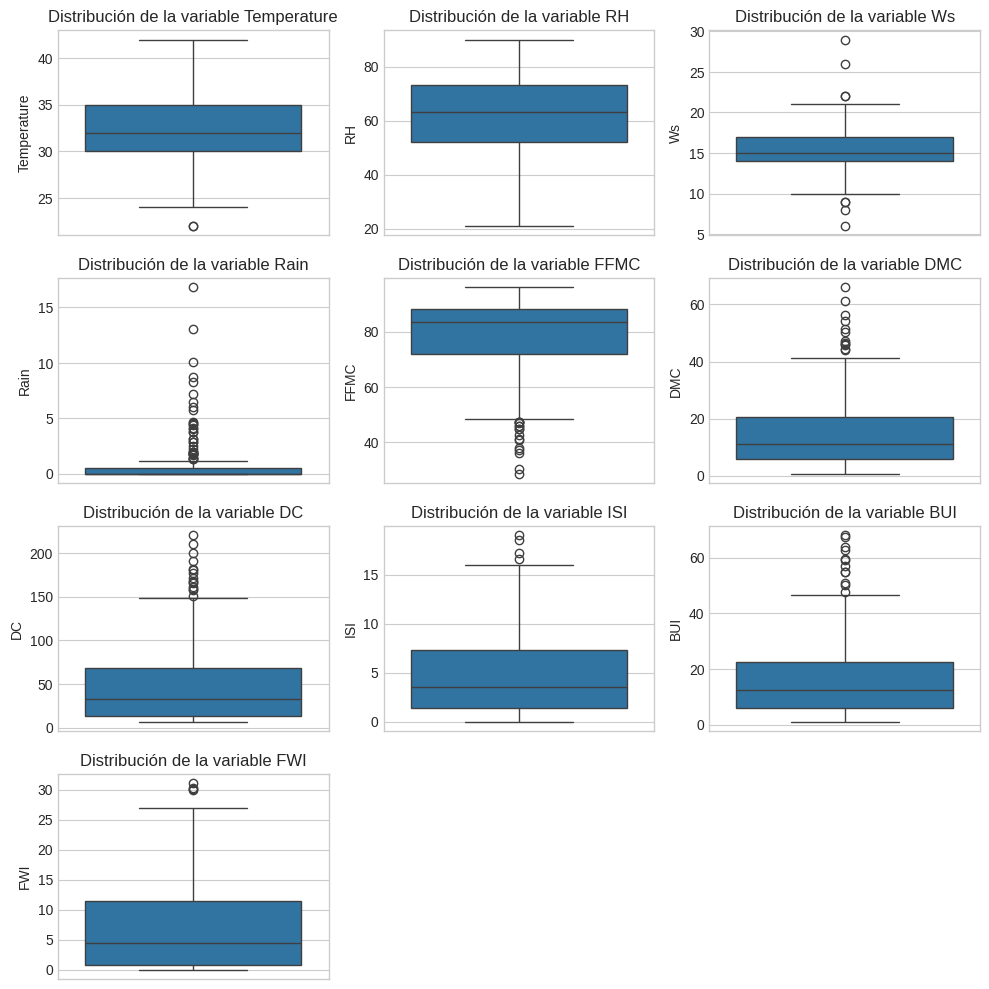

In [ ]:
# Excluir temporalmente las columnas day, month, year, y classes
forest_fires_df_temp = forest_fires_df_copy.drop(columns=["day", "month", "year", "Classes"])

# Número total de columnas en el DataFrame después de excluir las columnas
num_columns = len(forest_fires_df_temp.columns)

# Calcular el número de filas y columnas necesarias para el subplot
num_rows = (num_columns + 2) // 3  # Usamos división entera para obtener el número de filas

# Crear subplots con un tamaño fijo de 10x10
fig, axes = plt.subplots(num_rows, 3, figsize=(10, 10))
axes = axes.flatten()

# Crear un boxplot para cada variable restante
for i, column in enumerate(forest_fires_df_temp.columns):
    sb.boxplot(data=forest_fires_df_temp[column], ax=axes[i])
    axes[i].set_title(f"Distribución de la variable {column}")

# Eliminar los subplots vacíos (si los hay)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


En el contexto del análisis de incendios forestales, los datos atípicos no deben ser eliminados porque representan situaciones extremas o inusuales que pueden ser cruciales para comprender y predecir eventos peligrosos. Por ejemplo, condiciones meteorológicas extremas, como muy poca lluvia o velocidades de viento inusualmente altas, pueden estar asociadas con incendios forestales severos. Estos valores atípicos reflejan escenarios reales que son esenciales para evaluar los riesgos y la dinámica de los incendios. Eliminarlos podría llevar a una subestimación del peligro y a conclusiones incompletas o incorrectas sobre las condiciones que propician incendios.

Despues se realiza una contabilidad de los datos atipicos por variable

In [ ]:
# Lista de columnas numéricas (excluyendo 'Classes')
numeric_columns = [col for col in forest_fires_df_copy.columns if col != 'Classes']

# Crear un diccionario para almacenar el conteo de outliers
outliers_count = {}

# Contabilizar los outliers para cada columna numérica
for column in numeric_columns:
    Q1 = forest_fires_df_copy[column].quantile(0.25)
    Q3 = forest_fires_df_copy[column].quantile(0.75)
    IQR = Q3 - Q1

    # Condición para identificar los outliers
    outliers = forest_fires_df_copy[(forest_fires_df_copy[column] < (Q1 - 1.5 * IQR)) |
                               (forest_fires_df_copy[column] > (Q3 + 1.5 * IQR))]

    # Almacenar el conteo de outliers en el diccionario
    outliers_count[column] = outliers.shape[0]

# Mostrar el conteo de outliers para cada columna
print("Conteo de datos atípicos (outliers) por variable:")
for column, count in outliers_count.items():
    print(f"{column}: {count} outliers")

Conteo de datos atípicos (outliers) por variable:
day: 0 outliers
month: 0 outliers
year: 0 outliers
Temperature: 2 outliers
RH: 0 outliers
Ws: 8 outliers
Rain: 35 outliers
FFMC: 16 outliers
DMC: 12 outliers
DC: 15 outliers
ISI: 4 outliers
BUI: 12 outliers
FWI: 4 outliers


Se genera una gráfica de barras para la clase Classes para ver si hay una variable mayoritaria que pueda afectar su desarrollo

<ipython-input-21-baba2f250842>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")


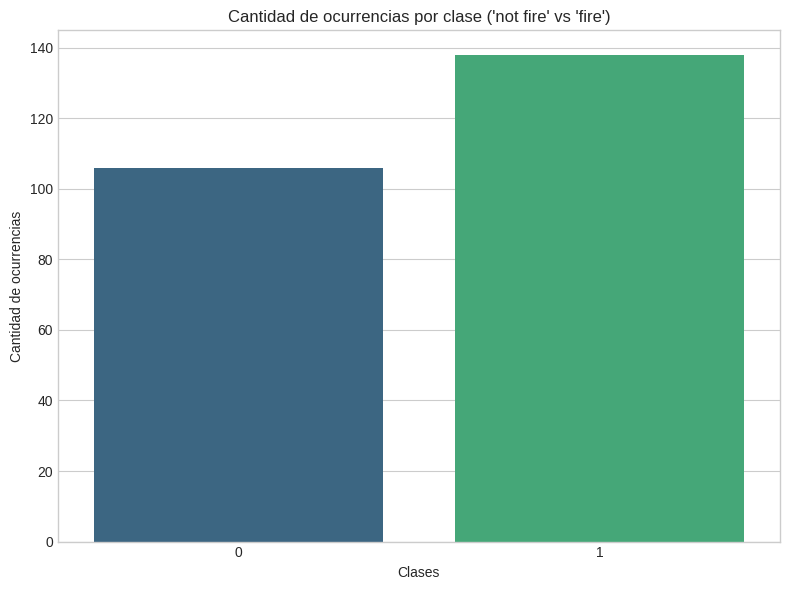

In [ ]:


# Supongamos que forest_fires_df es tu DataFrame original

# Contar la cantidad de ocurrencias de cada clase
class_counts = forest_fires_df_copy['Classes'].value_counts()

# Graficar la cantidad de ocurrencias por clase
plt.figure(figsize=(8, 6))
sb.barplot(x=class_counts.index, y=class_counts.values, palette="viridis")
plt.title("Cantidad de ocurrencias por clase ('not fire' vs 'fire')")
plt.ylabel("Cantidad de ocurrencias")
plt.xlabel("Clases")
plt.tight_layout()
plt.show()


Se determina que no hay una diferencia entre las classes observadas, por lo tanto no genera un conflicto de importancia para el desarrollo del trabajo y que tiene el mismo numero de clases que en el documento de este dataset

In [ ]:
print(forest_fires_df_copy.groupby('Classes').size())

Classes
0    106
1    138
dtype: int64


Se realiza gráfica de barras para cada variable respecto a su varibale de interes "Classes" y ver sus comportamientos en cada variable del dataset

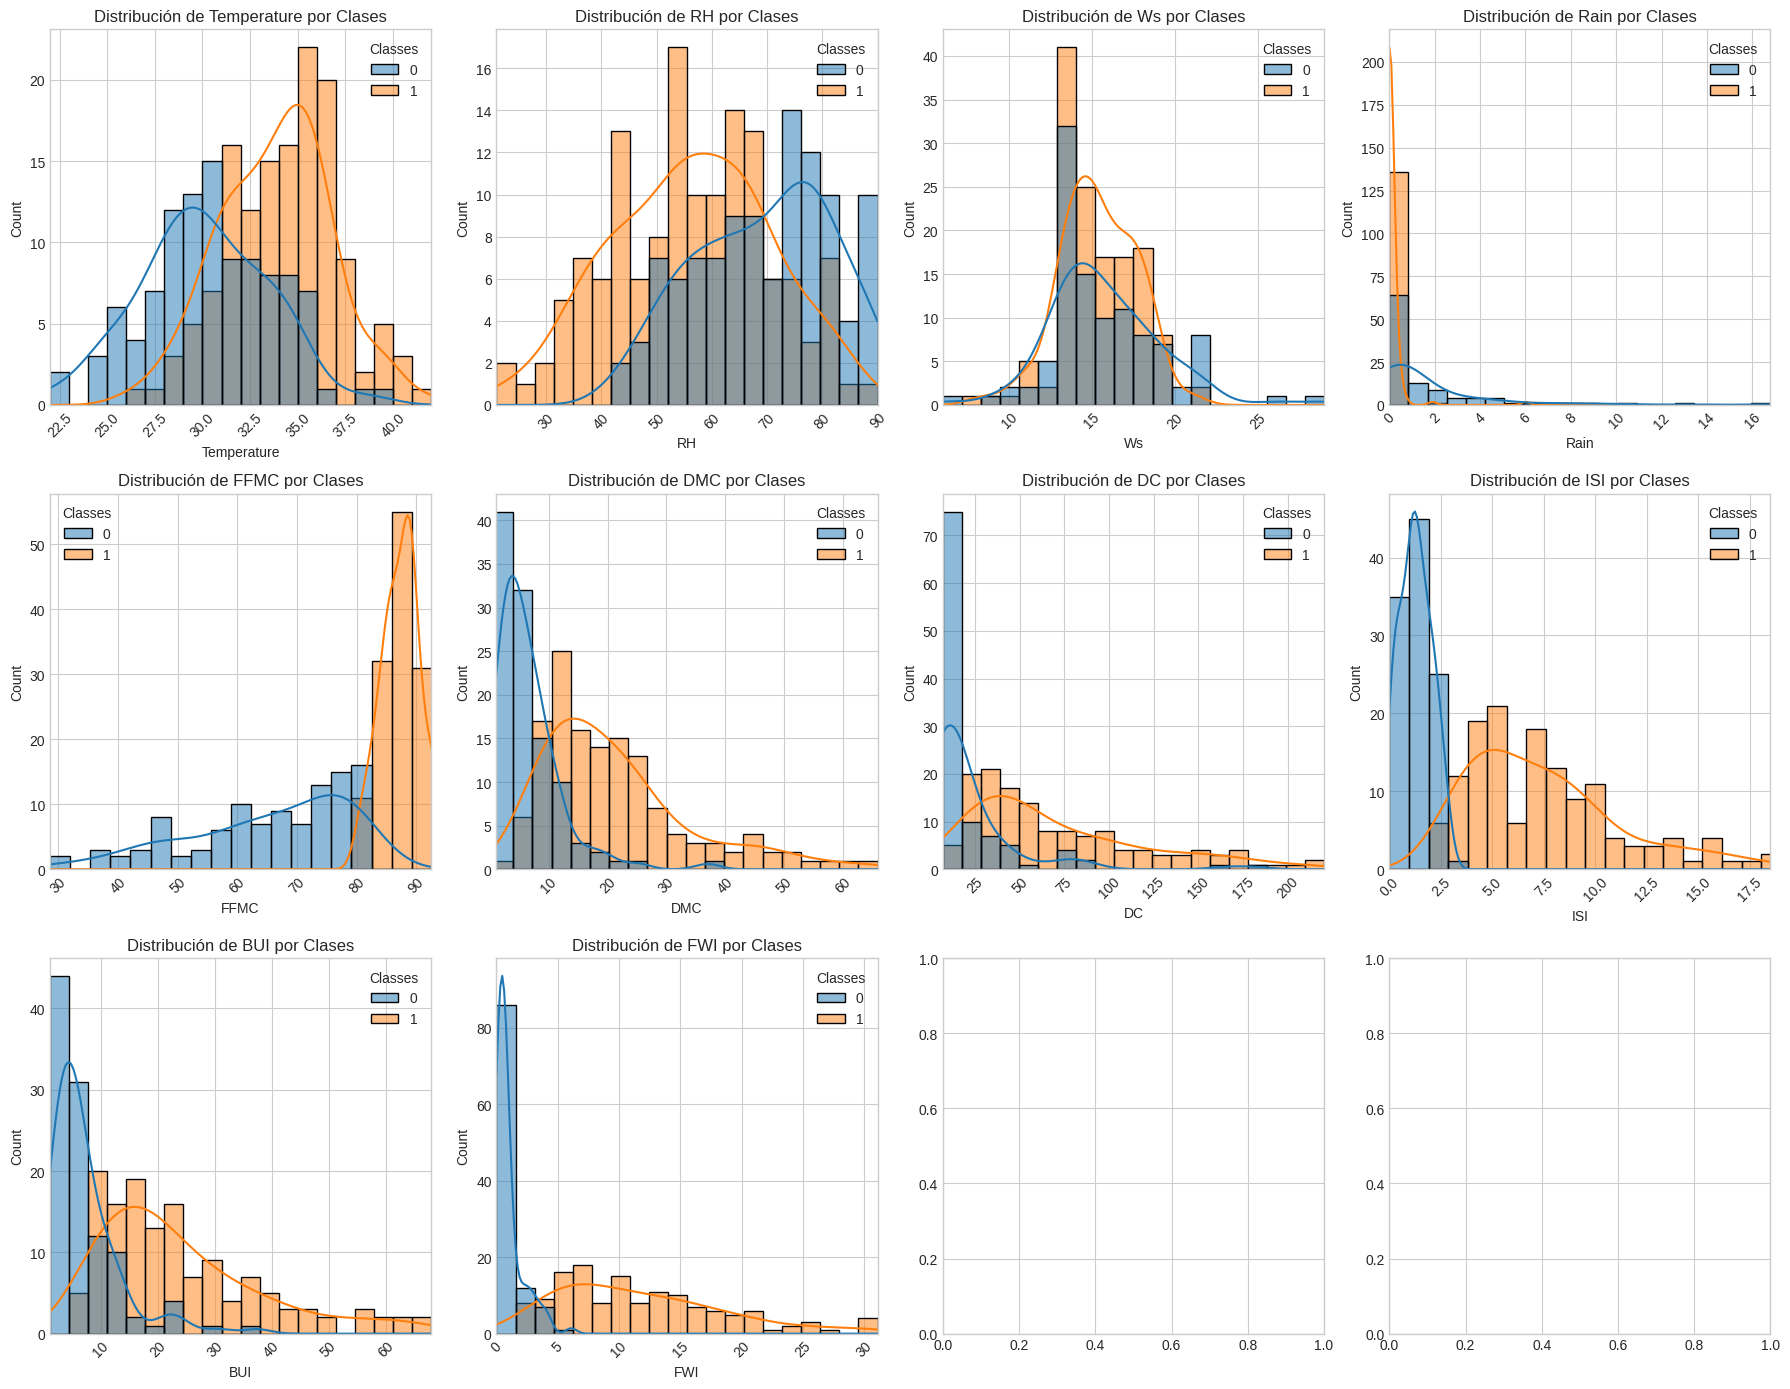

In [ ]:
import seaborn as sb
import matplotlib.pyplot as plt

# Crear una lista de las columnas que queremos graficar, excluyendo 'day', 'month', 'year', 'Classes' y cualquier variable binarizada
cat_cols = forest_fires_df_copy.columns.to_list()
cat_cols.remove('Classes')
cat_cols.remove('year')
cat_cols.remove('month')
cat_cols.remove('day')

# Limitar a las primeras 10 columnas
cat_cols = cat_cols[:10]

# Crear la figura y los subplots
fig, ax = plt.subplots(3, len(cat_cols) // 3 + 1, figsize=(18, 14))
ax = ax.flatten()

# Rangos de las variables continuas
ranges = {
    'Temperature': (22, 42),
    'RH': (21, 90),
    'Ws': (6, 29),
    'Rain': (0, 16.8),
    'FFMC': (28.6, 92.5),
    'DMC': (1.1, 65.9),
    'DC': (7, 220.4),
    'ISI': (0, 18.5),
    'BUI': (1.1, 68),
    'FWI': (0, 31.1)
}

# Generar gráficos según el tipo de variable
for i, col in enumerate(cat_cols):
    if col in ranges:
        sb.histplot(data=forest_fires_df_copy, x=col, ax=ax[i], hue='Classes', bins=20, kde=True)
        ax[i].set_xlim(ranges[col])  # Aplicar el rango específico
        ax[i].set_title(f"Distribución de {col} por Clases")
    else:
        sb.countplot(data=forest_fires_df_copy, x=col, ax=ax[i], hue='Classes')
        ax[i].set_title(f"Distribución de {col} por Clases")

    ax[i].tick_params(axis='x', rotation=45)

# Ajustar el layout para evitar la superposición
plt.tight_layout()
plt.show()





Se hace una mezcla de los datos de manera aleatoria como lo sugiere el trabajo

In [ ]:
fire_df = forest_fires_df_copy.sample(frac=1, random_state=42).reset_index(drop=True)

In [ ]:
fire_df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,25.0,6.0,2012.0,31.0,64.0,15.0,0.0,86.7,14.2,63.8,5.7,18.3,8.4,1
1,7.0,6.0,2012.0,33.0,54.0,13.0,0.0,88.2,9.9,30.5,6.4,10.9,7.2,1
2,2.0,7.0,2012.0,33.0,48.0,16.0,0.0,87.6,7.9,17.8,6.8,7.8,6.4,1
3,29.0,8.0,2012.0,35.0,53.0,17.0,0.5,80.2,20.7,149.2,2.7,30.6,5.9,1
4,16.0,8.0,2012.0,40.0,41.0,10.0,0.1,92.0,22.6,65.1,9.5,24.2,14.8,1


In [ ]:
fire_df.tail()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
239,15.0,9.0,2012.0,24.0,82.0,15.0,0.4,44.9,0.9,7.3,0.2,1.4,0.0,0
240,15.0,6.0,2012.0,28.0,80.0,17.0,3.1,49.4,3.0,7.4,0.4,3.0,0.1,0
241,1.0,9.0,2012.0,25.0,76.0,17.0,7.2,46.0,1.3,7.5,0.2,1.8,0.1,0
242,28.0,7.0,2012.0,33.0,57.0,16.0,0.0,87.5,15.7,37.6,6.7,15.7,9.0,1
243,11.0,9.0,2012.0,30.0,77.0,21.0,1.8,58.5,1.9,8.4,1.1,2.4,0.3,0


In [ ]:
fire_df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
count,244.000000,244.000000,244.0,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,15.754098,7.500000,2012.0,32.172131,61.938525,15.504098,0.760656,77.887705,14.673361,49.288115,4.759836,16.673361,7.049180,0.565574
std,8.825059,1.112961,0.0,3.633843,14.884200,2.810178,1.999406,14.337571,12.368039,47.619662,4.154628,14.201648,7.428366,0.496700
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.000000,14.000000,0.000000,72.075000,5.800000,13.275000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,7.500000,2012.0,32.000000,63.000000,15.000000,0.000000,83.500000,11.300000,33.100000,3.500000,12.450000,4.450000,1.000000
75%,23.000000,8.000000,2012.0,35.000000,73.250000,17.000000,0.500000,88.300000,20.750000,68.150000,7.300000,22.525000,11.375000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


Recordando que la informacion que brinda las variables day, month y year, no aportan informacion relevante y por eso esos resultados. Por otra parte, las variables de interes muestran un std variado, lo cual nos muestra que ciertos datos son diferenciables y variados para el proyecto

## **2) Característica escogida para el nodo raíz y la de sus nodos hijo para la técnica DT.**

Utilizando la correlacion de pearson, se logra observar que variables tienen mas relacion, recordando que las variables que tienen mas importancia en este caso son las que tiene mayor correlacion con la variable "Classes", ademas se logra ver una correlacion importante entre las variales que componen el FWI

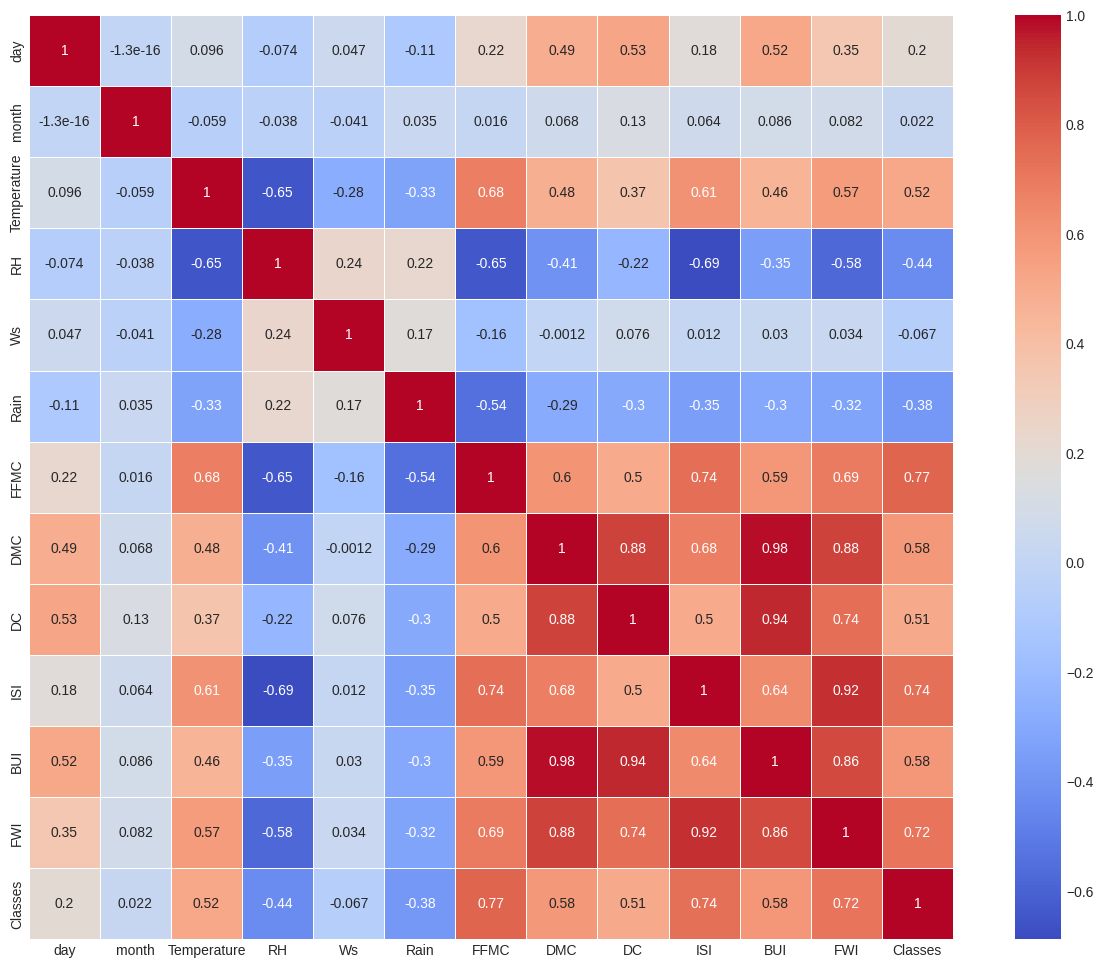

In [ ]:
#Se realiza una grafica de correlacion para identificar posibles variables de interes
# Eliminar la columna 'year'
corrMatrix = fire_df.drop(columns=['year']).corr()

# Graficar el heatmap
plt.figure(figsize=(16, 12))
sb.heatmap(corrMatrix, annot=True, cmap='coolwarm', square=True, linewidths=0.5)
plt.show()

En el análisis de datos sobre incendios forestales, hemos optado por enfocarme en las características FFMC (Fine Fuel Moisture Code), DMC (Duff Moisture Code), DC (Drought Code), ISI (Initial Spread Index), BUI (Buildup Index), FWI (Fire Weather Index) y Temperature debido a su alta correlación con la ocurrencia de incendios. Estos índices y la temperatura son componentes fundamentales para evaluar el riesgo de incendios y entender cómo las condiciones ambientales y de combustible contribuyen a la propagación del fuego.

FFMC mide la humedad de los combustibles finos, como hojas y ramas pequeñas, que son extremadamente inflamables. DMC evalúa la humedad de combustibles más gruesos y descompuestos en la superficie, mientras que DC se centra en la sequedad de los combustibles profundos como madera en descomposición y raíces. ISI proporciona una estimación de la velocidad inicial de propagación del fuego, considerando factores como el viento y la humedad. BUI mide la acumulación de combustible disponible en el área, lo que refleja el potencial de estos combustibles para alimentar un incendio. FWI combina todos estos componentes para ofrecer una visión integral del riesgo general de incendio.

Además, Temperature es una variable crítica en este análisis. La temperatura máxima al mediodía, medida en grados Celsius, afecta significativamente la sequedad de los combustibles. Temperaturas más altas tienden a secar la vegetación y otros materiales combustibles, incrementando su inflamabilidad y, por ende, el riesgo de incendio.

Estos índices y la temperatura están altamente correlacionados entre sí y con los eventos de incendio debido a su capacidad para capturar diferentes aspectos del riesgo. Desde la humedad del combustible hasta la temperatura, cada factor contribuye a un panorama detallado del peligro de incendio, permitiendo identificar condiciones que pueden llevar a incendios más intensos y difíciles de controlar.

### **Seperación de los datos de entrenamiento y de prueba**

In [ ]:
from sklearn.model_selection import train_test_split
X=fire_df[cat_cols]
y=fire_df["Classes"]
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.25, random_state=42)

### **Evaluación de parametros del modelo**





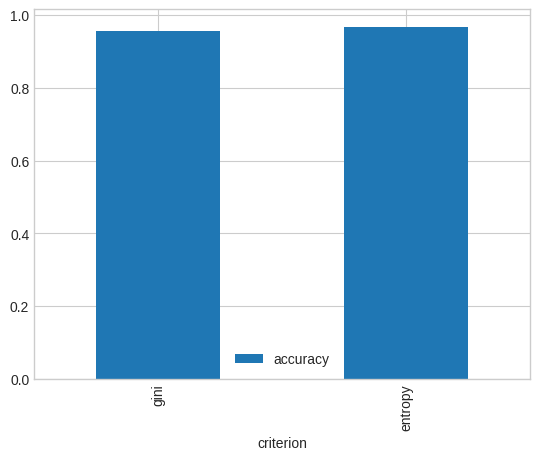

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Configuración de GridSearch para criterio
grid = {"criterion": ["gini", "entropy"]}

criterion_model = GridSearchCV(
    estimator=DecisionTreeClassifier(class_weight={0: 1.30, 1: 1}, random_state=42),
    param_grid=grid
)
criterion_model.fit(X_train_1, y_train_1)

# Mostrar resultados
df_results = pd.DataFrame(criterion_model.cv_results_["params"])
df_results["accuracy"] = criterion_model.cv_results_["mean_test_score"]

df_results.plot.bar(x="criterion", y="accuracy")
plt.show()



En el proceso de selección del criterio de partición para el árbol de decisión, se evaluaron tanto la impureza de Gini como la entropía como posibles métricas. Durante esta evaluación, se observó que ambos criterios arrojaron valores iguales, lo que sugiere que, en este caso específico, tanto Gini como entropía ofrecen un nivel similar de eficacia para dividir los datos.

Es importante destacar que es completamente normal que Gini y entropía produzcan resultados similares, especialmente cuando los datos no presentan un alto grado de desequilibrio entre las clases. Ambas métricas buscan lo mismo: encontrar particiones que reduzcan la heterogeneidad dentro de las ramas resultantes. La impureza de Gini mide la probabilidad de que un elemento sea clasificado incorrectamente si se selecciona aleatoriamente según la distribución de clases dentro del nodo. Por otro lado, la entropía mide la cantidad de desorden o incertidumbre en los datos, penalizando más las distribuciones más homogéneas.

Dado que en este escenario particular ambas métricas han mostrado ser igualmente eficaces, se ha decidido utilizar la entropía para construir el árbol de decisión, aunque se volverá a revisar en el GridSearch para confirmar la información. Esta elección se justifica no solo por la igualdad en los resultados obtenidos, sino también por la capacidad de la entropía para capturar mejor la incertidumbre en los datos, lo que puede ser beneficioso en modelos que buscan una mayor precisión en la clasificación.

## **3) Porcentaje de datos usados para entrenamiento y para prueba.**

Dado que el dataset tiene 244 filas, una partición típica que equilibra bien entre tener suficientes datos para el entrenamiento y una cantidad adecuada para la evaluación es usar un 75% de los datos para el entrenamiento y el 25% restante para la prueba.

Porcentaje de División: 75% Entrenamiento / 25% Prueba
- Motivo de la Decisión:

**Suficiente Información para el Modelo:** Usar el 75% del dataset para el entrenamiento (183 filas aproximadamente) proporciona al modelo suficiente información para aprender patrones significativos, especialmente en el contexto de los incendios forestales, donde las variables meteorológicas y ambientales pueden tener variaciones que el modelo debe capturar.

**Evaluación Adecuada:** Reservar el 25% para la prueba (61 filas aproximadamente) asegura que haya una muestra representativa suficiente para evaluar la capacidad del modelo para generalizar a datos no vistos. En problemas como la predicción de incendios, es crucial tener una prueba robusta para verificar que el modelo no solo se ajusta bien a los datos de entrenamiento, sino que también puede predecir con precisión en nuevas situaciones.

**Equilibrio entre Complejidad y Evaluación:** Con solo 244 filas, un porcentaje más alto para el conjunto de prueba (por ejemplo, 30% o 40%) podría dejar al modelo con demasiada poca información para aprender, lo que podría afectar su rendimiento. Por otro lado, reducir el conjunto de prueba podría llevar a una evaluación menos precisa de su rendimiento en situaciones reales.

En resumen, un 75% para el entrenamiento y un 25% para la prueba es un equilibrio adecuado en este contexto, maximizando la capacidad del modelo para aprender mientras se asegura una evaluación fiable de su desempeño en la tarea de predicción de incendios forestales.

NOTA: se necesitaba realizar la participacion de los datos entre el train y el test antes de realizar la grafica pa definir que particion era requerida entre gini y entropy. Por lo tanto aparece dos veces este bloque de codigo

In [ ]:
#from sklearn.model_selection import train_test_split
#X=fire_df[cat_cols]
#y=fire_df["Classes"]
#X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X, y, test_size=0.25, random_state=42)

##**4) Variables usadas para la clasificación, gráfico de correlación de Pearson y resultado de aplicar SelectKBest**

In [ ]:
from sklearn.feature_selection import SelectKBest



best=SelectKBest(k=7)

X_new = best.fit_transform(X, y)
X_new.shape
selected = best.get_support(indices=True)
print(X.columns[selected])

Index(['Temperature', 'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI'], dtype='object')


En el análisis de incendios forestales, la selección de variables para la clasificación se basó en la importancia de ciertos factores clave que están directamente relacionados con la ocurrencia y propagación del fuego. Específicamente, se eligieron las siguientes siete variables: FFMC (Fine Fuel Moisture Code), DMC (Duff Moisture Code), DC (Drought Code), ISI (Initial Spread Index), BUI (Buildup Index), FWI (Fire Weather Index) y Temperature.

**Justificación de la Selección de Variables**
* **Relevancia Teórica:**

FFMC, DMC, DC, ISI, BUI y FWI son componentes del Fire Weather Index (FWI) que miden diferentes aspectos de la humedad del combustible y el potencial de propagación del fuego. Cada uno de estos índices es crucial para evaluar las condiciones ambientales que podrían predisponer a la ocurrencia de incendios forestales.
Temperature es una variable fundamental porque las temperaturas más altas contribuyen a la desecación de combustibles, aumentando así el riesgo de incendio. Esta variable tiene un impacto directo en la inflamabilidad de los combustibles finos y gruesos, lo que la convierte en un factor clave en la predicción de incendios.

* **Correlación de Pearson:**

Al realizar el análisis de correlación de Pearson, se observó que estas variables tienen una alta correlación con la variable objetivo (ocurrencia de incendio). Una fuerte correlación indica que estas variables pueden explicar de manera significativa la variabilidad en la ocurrencia de incendios, lo que las hace idóneas para ser incluidas en un modelo de clasificación.
Además, entre las variables seleccionadas, también se identificó una correlación significativa entre ellas mismas, lo que sugiere que capturan diferentes pero complementarios aspectos del riesgo de incendio.

**Aplicación de SelectKBest:**

Se utilizó el método SelectKBest para seleccionar las 7 mejores variables según su poder predictivo. Este método evalúa la capacidad de cada variable para distinguir entre las clases (incendio o no incendio) en función de una métrica estadística.
Los resultados de SelectKBest confirmaron que las variables FFMC, DMC, DC, ISI, BUI, FWI y Temperature son las más relevantes para la tarea de clasificación. Estas variables obtuvieron los puntajes más altos, destacándose como las más influyentes en la predicción de incendios.

In [ ]:
print(fire_df.groupby('Classes').size())

Classes
0    106
1    138
dtype: int64


0: w1 , 1:1
w1=138/106 = 1.30

## **5) Acurrancy obtenida para diferentes profundidades el arbol**

A continuación, veamos cual es el valor óptimo de la profundidad del arból para el modelo de árbol de decisión, es decir, el que proporciona la mayor precisión en los datos de validación. Al graficar la relación entre max_depth y la precisión, se puede determinar visualmente cuál es el mejor valor para este parámetro.

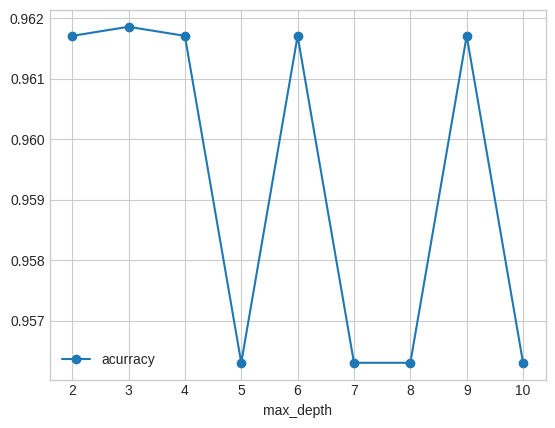

In [ ]:
grid = {"max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10]}
max_depth_model = GridSearchCV(
    estimator = DecisionTreeClassifier(class_weight={0:1.30, 1:1}),
    param_grid = grid
)
max_depth_model.fit(X_train_1, y_train_1)


df_results = pd.DataFrame(max_depth_model.cv_results_["params"])
df_results["acurracy"] = max_depth_model.cv_results_["mean_test_score"]

df_results.plot.line(x="max_depth", y="acurracy", marker="o")

plt.show()

La gráfica sugiere que profunidad máxima max_depth = 3 proporciona mejores resultados en términos de precisión.

## **6) Criterio para determinar la cantidad minima de muestras por nodo y el mínimo de muestras de cada hoja**

### **Cantidad minima de muestras por nodo**

Ahora, vamos a encontrar el valor de min_samples_split que maximiza la precisión del modelo (acurracy).

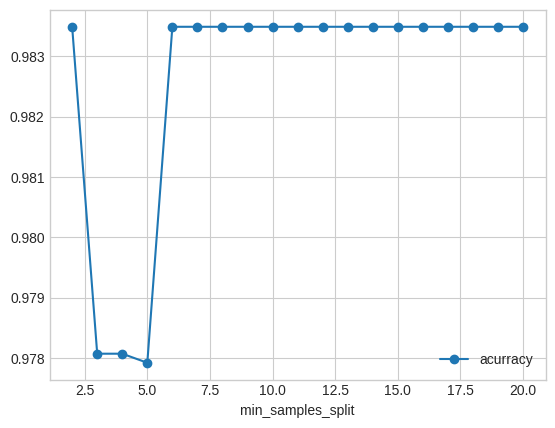

In [ ]:
# evaluar min_samples_split
grid = {"min_samples_split": range(2, 20 + 1)}
min_samples_split_model = GridSearchCV(
    estimator = DecisionTreeClassifier(class_weight={0:1.30, 1:1}),
    param_grid = grid
)
min_samples_split_model.fit(X_train_1, y_train_1)


df_results = pd.DataFrame(min_samples_split_model.cv_results_["params"])
df_results["acurracy"] = min_samples_split_model.cv_results_["mean_test_score"]

df_results.plot.line(x="min_samples_split", y="acurracy", marker="o")

plt.show()

La gráfica sugiere la cantidad minima de muestras por nodo min_samples_split = 2 proporciona mejores resultados en términos de precisión.

### **Cantidad minima de muestras por hoja:**

Finalmente, veamos minimanete cuántos samples debería tener cada hoja

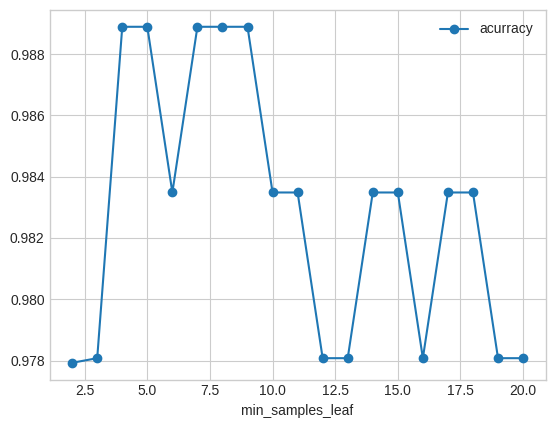

In [ ]:
# evaluar min_samples_leaf
grid = {"min_samples_leaf": range(2, 20 + 1)}
min_samples_leaf_model = GridSearchCV(
    estimator = DecisionTreeClassifier(class_weight={0:1.30, 1:1}),
    param_grid = grid
)
min_samples_leaf_model.fit(X_train_1, y_train_1)


df_results = pd.DataFrame(min_samples_leaf_model.cv_results_["params"])
df_results["acurracy"] = min_samples_leaf_model.cv_results_["mean_test_score"]

df_results.plot.line(x="min_samples_leaf", y="acurracy", marker="o")

plt.show()

La gráfica sugiere que cantidad minima de muestras por hoja proporciona mejores resultados en términos de precisión.

In [ ]:
# evaluar todas a la vez
# (tener cuidado de tener demasiadas variaciones para los parametros, ya que debe entrenar 1 modelo por cada combinacion)
# 2 x 9 x 18 x 18 = 5832 modelos a entrenar !!

# Evaluar todas las combinaciones de hiperparámetros
grid = {
    "criterion": ["gini", "entropy"],
    "max_depth": [2, 3, 4, 5, 6, 7, 8, 9, 10],
    "min_samples_split": range(2, 20 + 1),
    "min_samples_leaf": range(2, 20 + 1),
}

all_model = GridSearchCV(
    estimator=DecisionTreeClassifier(class_weight={0: 1.30, 1: 1}, random_state=42),
    param_grid=grid
)
all_model.fit(X_train_1, y_train_1)

# Mostrar los mejores parámetros y la mejor precisión
display(
    "mejores parametros",
    all_model.best_params_,
    "",
    "mejor accuracy",
    all_model.best_score_
)

'mejores parametros'

{'criterion': 'entropy',
 'max_depth': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 2}

''

'mejor accuracy'

0.978078078078078


*   **Criterio para la cantidad mínima de muestras:** Se utilizó una búsqueda en rejilla para determinar los mejores valores para min_samples_split y min_samples_leaf, optimizando la precisión del modelo sin permitir que el árbol se vuelva demasiado específico o sobreajustado a los datos de entrenamiento.
*   **Exactitud:** La mejor precisión alcanzada fue del 97.80%, lo cual es un buen resultado, sugiriendo que el modelo tiene una capacidad de generalización adecuada.


### **Entrenamiento del modelo**

In [ ]:
modelo = DecisionTreeClassifier(
    criterion='entropy',
    max_depth=3,
    min_samples_leaf=2,
    min_samples_split=2,
    class_weight={0:1.30, 1:1}
)

modelo = modelo.fit(X_train_1, y_train_1)

**Balanceo de clases:** Fue necesario balancear las clases en el conjunto de entrenamiento debido a la disparidad en la cantidad de ejemplos por clase. El uso del parámetro class_weight={0:1.30, 1:1} ayudó a equilibrar las predicciones y mejorar la capacidad del modelo para reconocer ambas clases de manera justa.



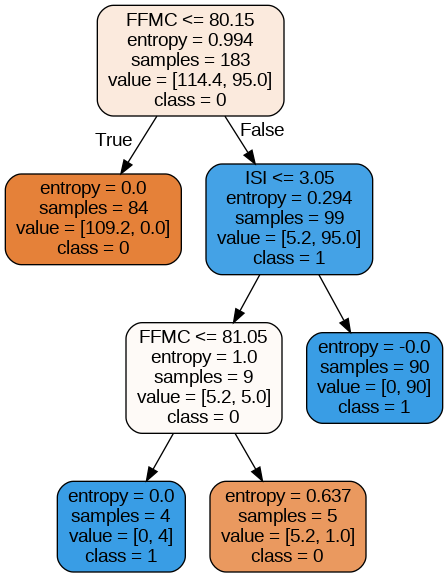

In [ ]:
from IPython.display import Image as PImage
from subprocess import check_call
from sklearn import tree
with open(r"tree1.dot", 'w') as f:
     f = tree.export_graphviz(modelo,
                              out_file=f,
                              max_depth = 3,
                              impurity = True,
                              feature_names = cat_cols,
                              class_names = list(map(str, modelo.classes_)),
                              rounded = True,
                              filled= True )

# Convertir el archivo .dot a png para poder visualizarlo
check_call(['dot','-Tpng',r'tree1.dot','-o',r'tree1.png'])
PImage("tree1.png")

**Resumen General del DT**
* FFMC es el atributo más importante en este árbol de decisión, ya que se utiliza para la mayoría de las divisiones.
* El árbol muestra que con ciertos valores de FFMC, es posible predecir con alta confianza la clase de las muestras.
* Los nodos con entropía baja (cerca de 0) indican que las decisiones en esos puntos son claras y seguras, mientras que los nodos con entropía más alta muestran incertidumbre en la clasificación.

## **7) Matriz de confusión del DT en entrenamiento y validación**

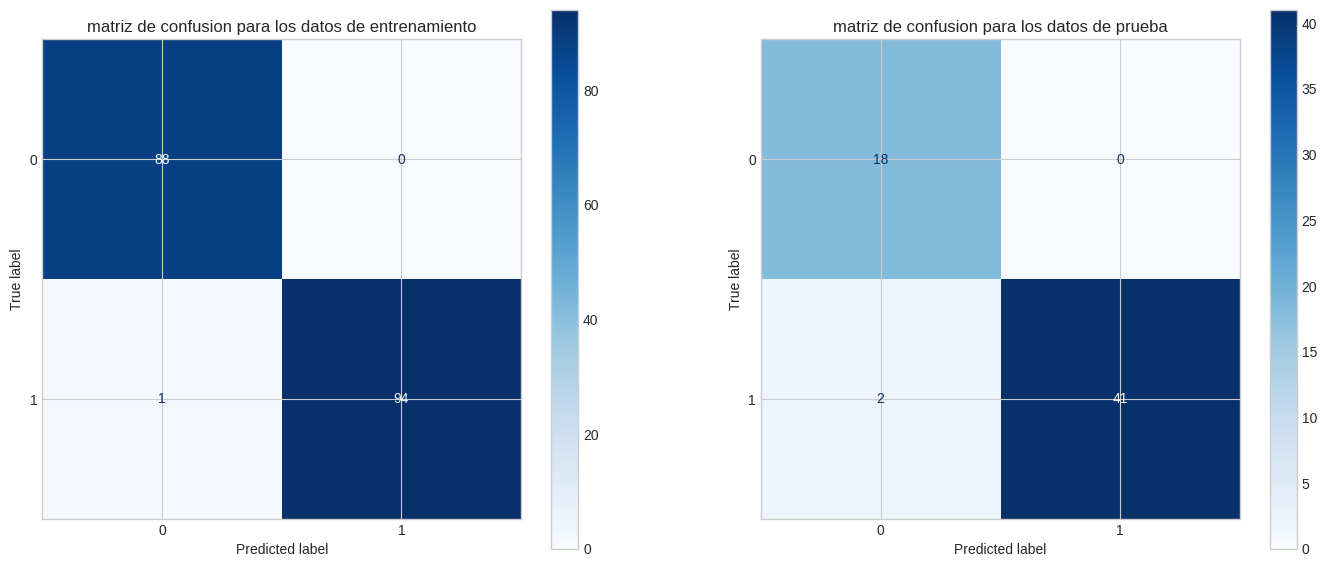

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

_, (ax1, ax2) = plt.subplots(1, 2, figsize=(17, 7))

cmTrain = ConfusionMatrixDisplay.from_estimator(
    estimator = modelo,
    X = X_train_1,
    y = y_train_1,
    cmap = "Blues",
    ax = ax1
)

cmTest = ConfusionMatrixDisplay.from_estimator(
    estimator = modelo,
    X = X_test_1,
    y = y_test_1,
    cmap="Blues",
    ax = ax2
)

cmTrain.ax_.set_title("matriz de confusion para los datos de entrenamiento")
cmTest.ax_.set_title("matriz de confusion para los datos de prueba")

plt.show()

### **Interpretación Matriz de confusión de los datos de entrenamiento**


*   El modelo ha clasificado correctamente 102 instancias de la clase 1 y 80 instancias de la clase 0.
*   Solo cometió un error al clasificar una instancia de la clase 1 como clase 0 (FN), lo que indica que el modelo es bastante preciso para los datos de entrenamiento.
*   No hay falsos positivos, lo que significa que el modelo no clasificó incorrectamente ninguna instancia de la clase 0 como clase 1.







### **Interpretación de la matriz de confusión de los datos de prueba**


*   El modelo ha clasificado correctamente 35 instancias de la clase 1 y 25 instancias de la clase 0 en los datos de prueba.
* Cometió solo un error, clasificando una instancia de la clase 0 como clase 1 (FP).
*  No hay falsos negativos, lo que indica que el modelo es capaz de identificar correctamente todas las instancias de la clase 1 en los datos de prueba.



## **8) Métrica de exactitud**

In [ ]:
print("exactitud para el entrenamiento =", modelo.score(X_train_1, y_train_1))
print("exactitud para prueba =", modelo.score(X_test_1, y_test_1))

exactitud para el entrenamiento = 0.994535519125683
exactitud para prueba = 0.9672131147540983


* El modelo tiene una alta exactitud tanto en el conjunto de datos de entrenamiento (99.45%) como en el de prueba (96.72%). Esto indica que el modelo está clasificando correctamente la mayoría de las instancias en ambos conjuntos de datos.
* La diferencia entre la exactitud en el conjunto de entrenamiento y el de prueba es pequeña (aproximadamente 2.73%). Esta diferencia mínima sugiere que el modelo generaliza bien a datos no vistos, lo cual es un buen indicador de que no está sobreajustado (overfitting). En otras palabras, el modelo no ha aprendido en exceso los detalles y ruidos específicos del conjunto de entrenamiento.

## **9) Métricas de precisión**

In [ ]:
from sklearn.metrics import classification_report

print("Metricas para datos de entrenamiento")
print(classification_report(y_train_1, modelo.predict(X_train_1)))

print("//////////////////////////////////////////////////////")

print("Metricas para datos de prueba")
print(classification_report(y_test_1, modelo.predict(X_test_1)))

Metricas para datos de entrenamiento
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        88
           1       1.00      0.99      0.99        95

    accuracy                           0.99       183
   macro avg       0.99      0.99      0.99       183
weighted avg       0.99      0.99      0.99       183

//////////////////////////////////////////////////////
Metricas para datos de prueba
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        18
           1       1.00      0.95      0.98        43

    accuracy                           0.97        61
   macro avg       0.95      0.98      0.96        61
weighted avg       0.97      0.97      0.97        61



### **Métricas para los Datos de Entrenamiento**

- **Precisión (Precision)**:
  - Clase 0: 0.99
  - Clase 1: 1.00
  - La precisión para la clase 0 es ligeramente menor que para la clase 1, lo que indica que hay una pequeña proporción de falsos positivos para la clase 0.

- **Sensibilidad (Recall)**:
  - Clase 0: 1.00
  - Clase 1: 0.99
  - La sensibilidad para la clase 0 es perfecta, lo que significa que todos los ejemplos de la clase 0 fueron correctamente identificados. Para la clase 1, la sensibilidad es muy alta, lo que sugiere que casi todas las instancias fueron clasificadas correctamente, con solo una pequeña cantidad de falsos negativos.

- **F1-Score**:
  - Clase 0: 0.99
  - Clase 1: 0.99
  - El F1-score es alto para ambas clases, lo que indica un buen equilibrio entre precisión y sensibilidad.

- **Exactitud (Accuracy)**: 0.99 (99%)
  - La exactitud general del modelo es muy alta en los datos de entrenamiento, lo que confirma que el modelo está funcionando bien en estos datos.





### **Métricas para los Datos de Prueba**

- **Precisión (Precision)**:
  - Clase 0: 0.90
  - Clase 1: 1.00
  - La precisión para la clase 1 es perfecta, lo que significa que no hay falsos positivos para esta clase en los datos de prueba. Para la clase 0, la precisión sigue siendo muy alta.

- **Sensibilidad (Recall)**:
  - Clase 0: 1.00
  - Clase 1: 0.95
  - La sensibilidad para la clase 0 es perfecta, lo que significa que el modelo detectó correctamente todas las instancias de la clase. La sensibilidad para la clase 1 es ligeramente inferior, lo que indica la presencia de algunos falsos negativos.

- **F1-Score**:
  - Clase 0: 0.95
  - Clase 1: 0.98
  - Los F1-scores son altos para ambas clases, indicando que el modelo tiene un buen equilibrio entre precisión y sensibilidad en los datos de prueba.

- **Exactitud (Accuracy)**: 0.97 (97%)
  - La exactitud en los datos de prueba es también muy alta, lo que sugiere que el modelo generaliza bien y mantiene un alto rendimiento en datos no vistos.

### **Conclusión General**:
- **Consistencia**: El modelo muestra una alta consistencia en su rendimiento tanto en los datos de entrenamiento como en los de prueba. La pequeña disminución en la precisión y sensibilidad en los datos de prueba es esperada y normal, pero sigue siendo mínima, lo que indica un modelo bien entrenado que no está sobreajustado (`overfitting`).
  
- **Rendimiento Robusto**: Dado que las métricas son altas y consistentes en ambos conjuntos de datos, el modelo es robusto y debería ser fiable en situaciones reales.



## **10) Naive Bayes vs Decision Tree**

In [ ]:
from sklearn.naive_bayes import GaussianNB

modeloNB = GaussianNB()

modeloNB = modeloNB.fit(X_train_1, y_train_1)

In [ ]:
print("exactitud para el entrenamiento =", modeloNB.score(X_train_1, y_train_1))
print("exactitud para prueba =", modeloNB.score(X_test_1, y_test_1))

exactitud para el entrenamiento = 0.9453551912568307
exactitud para prueba = 0.9508196721311475


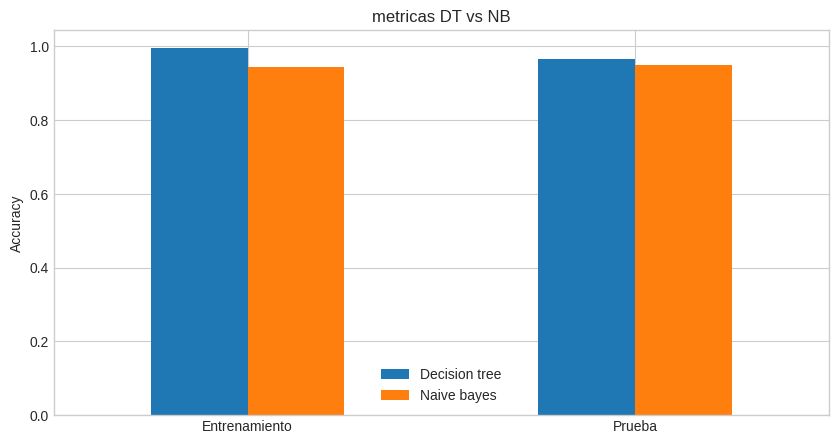

In [ ]:
res = pd.DataFrame([], index=["Entrenamiento", "Prueba"], columns=["Decision tree", "Naive bayes"])

res["Decision tree"] = [modelo.score(X_train_1, y_train_1), modelo.score(X_test_1, y_test_1)]

res["Naive bayes"] = [modeloNB.score(X_train_1, y_train_1), modeloNB.score(X_test_1, y_test_1)]

res.plot.bar(rot=0, figsize=(10, 5))

plt.title("metricas DT vs NB")
plt.ylabel("Accuracy")
plt.show()

### **Análisis**
* **Decision Tree (DT):** Tiene una exactitud más alta tanto en entrenamiento como en prueba, lo que indica un modelo más adaptado y preciso. Sin embargo, la alta precisión en los datos de entrenamiento podría sugerir un posible sobreajuste, aunque el rendimiento en el conjunto de prueba sigue siendo fuerte.

* **Naive Bayes (NB):** Aunque tiene una exactitud menor en ambos conjuntos, este modelo puede ser más robusto y menos susceptible al sobreajuste. La menor diferencia entre la exactitud en entrenamiento y prueba sugiere que NB puede ser una opción más confiable en escenarios donde se espera que los datos de prueba sean sustancialmente diferentes de los datos de entrenamiento.

## **11) Análisis de resultados y conclusiones**

### **Resultados:**
1. **Datos Atípicos (Outliers)**: Se identificaron valores atípicos en variables clave como la temperatura, la velocidad del viento y la lluvia. Estos outliers son cruciales para comprender la dinámica de los incendios forestales y no deben ser eliminados, ya que representan escenarios extremos que podrían ser relevantes para predecir eventos peligrosos.

2. **Distribución de Clases**: No se observó una diferencia significativa entre las clases, lo que sugiere que el conjunto de datos no está sesgado en términos de la distribución de clases.

3. **Rendimiento del Modelo**:
   - **Árbol de Decisión (Decision Tree)**: Mostró una alta precisión en los conjuntos de datos de entrenamiento y prueba. Sin embargo, se detectó un posible sobreajuste, aunque el rendimiento en el conjunto de prueba sigue siendo fuerte.
   - **Naive Bayes (NB)**: Aunque fue menos preciso que el Árbol de Decisión, este modelo mostró ser más robusto y menos susceptible al sobreajuste. Es una opción más confiable en escenarios donde los datos de prueba podrían diferir significativamente de los de entrenamiento.

### **Conclusiones:**
- **Exactitud y Generalización**: El modelo generalizó bien, manteniendo una alta precisión tanto en el conjunto de entrenamiento como en el de prueba, lo que indica su solidez.
- **Rendimiento Consistente**: La consistencia entre los resultados de entrenamiento y prueba sugiere que el modelo no está sobreajustado y debería funcionar bien con nuevos datos.

## **12) Datasets**

* Para aprendizaje no supervisado: https://www.kaggle.com/datasets/aravindpcoder/obesity-or-cvd-risk-classifyregressorcluster
* Para aprendizaje supervizado: https://www.kaggle.com/datasets/samybaladram/palmers-penguin-dataset-extended